<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_payoff_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 294 (delta 39), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (294/294), 1.04 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [2]:
cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src


##hw_payoff_correlation

###Objective - to investigate the correlations of payoffs between stock, euro call, geo asian call, arith asian call

In [0]:
#paras are given here
S0 = 100.0
K = 110.0
r=0.0475
sigma = 0.20
T = 1.
num_step = 4

In [0]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import array
from scipy.stats.mstats import gmean

In [0]:
#define a function of BM path generator
def BM_gen(T1, T2, n): #para: start time, end time, and the mesh number
  t = np.linspace(T1, T2, num = n+1) #init mesh
  W = np.zeros(n+1) #init BM
  #Run (3.2)
  for i in range(n):
    W[i+1] = W[i] + 1./np.sqrt(n) * np.random.normal()
    
  return t, W

In [0]:
def bsm_option_payoff_generator(self,
                               otype = 1,
                               strike = 110.,
                               maturity = 1.,
                               num_step = 4,
                               num_path = 10):
  
  s0 = self.init_state
  sigma = self.vol_ratio
  r = self.drift_ratio
  
  k = strike
  T = maturity
  m = num_step
  p = num_path
  h = T/m


  #initialize one array for stock price, and three arrays for payoffs
  arr_stock = array.array('f',[])#stock
  arr_euro_payoff = array.array('f',[])#european options
  arr_geoa_payoff = array.array('f',[])#geometric asian options
  arr_aritha_payoff = array.array('f',[])#arithmetic asian options
  for i in range(p):#we want the path and price for each stock simulation
    [t, S] = [BM_gen(0, T, m)[0],s0*np.exp((r-0.5*sigma**2)*h+sigma*BM_gen(0, T, m)[1])]
    plt.plot(t,S);
    
    #calculate stock price at maturity, and the payoffs for each path of stock price
    stock = S[m]
    arr_stock.append(stock)
    euro_payoff = np.maximum(0, otype*(stock-k))
    arr_euro_payoff.append(euro_payoff)
    geoa_payoff = np.maximum(0, otype*(gmean(S)-k))
    arr_geoa_payoff.append(geoa_payoff)
    aritha_payoff = np.maximum(0, otype*(np.mean(S)-k))
    arr_aritha_payoff.append(aritha_payoff)
    
  
  return arr_stock, arr_euro_payoff, arr_geoa_payoff, arr_aritha_payoff
 
Gbm_1d.bsm_option_payoff_generator = bsm_option_payoff_generator
  
  

array('f', [104.46076202392578, 78.90031433105469, 110.80218505859375, 90.61527252197266, 90.74007415771484, 83.31739807128906, 101.58526611328125, 94.24571228027344, 99.54573822021484, 106.28076934814453, 110.73086547851562, 72.95064544677734, 70.18341064453125, 98.11841583251953, 78.73982238769531, 79.19659423828125, 95.55393981933594, 106.4478530883789, 83.60511016845703, 111.23455810546875, 103.84075164794922, 123.76358795166016, 120.22713470458984, 98.19059753417969, 105.5705795288086, 100.84648895263672, 105.64684295654297, 91.73192596435547, 118.5898666381836, 101.45922088623047, 100.06884002685547, 116.72500610351562, 88.8727035522461, 85.98102569580078, 104.42489624023438, 72.7392807006836, 104.88780975341797, 82.3951644897461, 125.29899597167969, 104.86085510253906, 111.08114624023438, 54.908138275146484, 109.66316986083984, 66.19648742675781, 110.32821655273438, 115.09221649169922, 81.5313491821289, 97.39461517333984, 96.09969329833984, 104.900634765625, 112.43306732177734, 

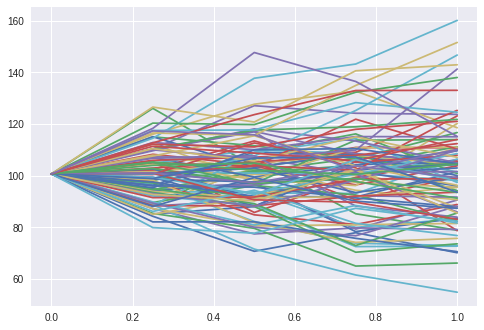

In [8]:
gbm1 = Gbm_1d(init_state = 100.0, drift_ratio = 0.0475, vol_ratio = 0.20)

k = 110.0
T = 1
num_step = 4
num_paths = 100
otype = 1

arr_stk, arr_ec, arr_gac, arr_aac = gbm1.bsm_option_payoff_generator(otype, k, T, num_step, num_paths)
print(arr_stk)
print(arr_ec)
print(arr_gac)
print(arr_aac)

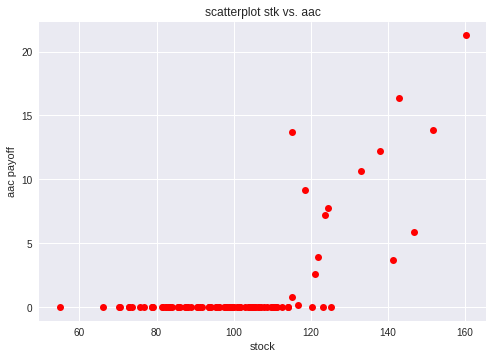

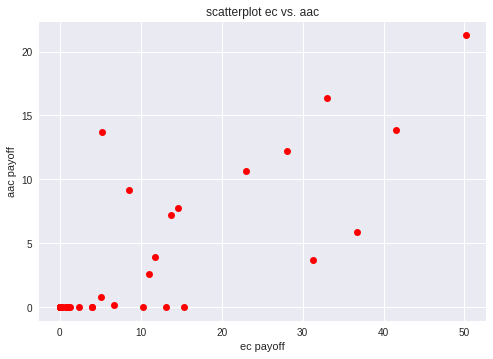

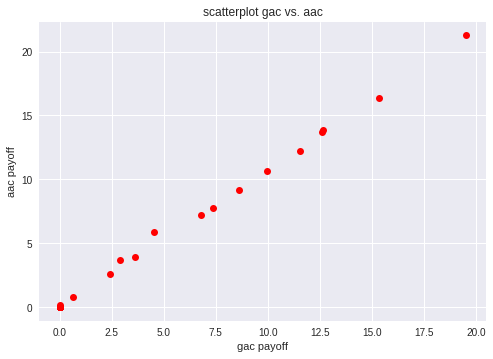

In [9]:
plt.plot(arr_stk, arr_aac, 'ro')
plt.title('scatterplot stk vs. aac')
plt.xlabel('stock')
plt.ylabel('aac payoff')
plt.show()
plt.plot(arr_ec, arr_aac, 'ro')
plt.title('scatterplot ec vs. aac')
plt.xlabel('ec payoff')
plt.ylabel('aac payoff')
plt.show()
plt.plot(arr_gac, arr_aac, 'ro')
plt.title('scatterplot gac vs. aac')
plt.xlabel('gac payoff')
plt.ylabel('aac payoff')
plt.show()

In [10]:
#calculate correlation
corr1 = np.corrcoef(arr_stk, arr_aac)
corr2 = np.corrcoef(arr_ec, arr_aac)
corr3 = np.corrcoef(arr_gac, arr_aac)
print('the correlation between stock and aac is ' + str(corr1))
print('the correlation between ec and aac is ' + str(corr2))
print('the correlation between gac and aac is ' + str(corr3))


the correlation between stock and aac is [[1.         0.65657399]
 [0.65657399 1.        ]]
the correlation between ec and aac is [[1.         0.84551206]
 [0.84551206 1.        ]]
the correlation between gac and aac is [[1.         0.99947379]
 [0.99947379 1.        ]]


##Observation

From the scatterplots and correlations calculated we observe a high correlation between geometric asian call payoffs and arithmetic asian call payoffs (gac vs. aac) among the three pairs

##Improving OMC computation of aac

???